# Unit 5 - Financial Planning

In [187]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [188]:
# Load .env enviroment variables
load_dotenv()

True

In [189]:
ap = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [190]:
type(ap)

str

In [191]:
ap

'PKN8HAC9REZDU0Y1RKD7'

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [192]:
# Set current amount of crypto assets
my_btc = 10
my_eth = 100

In [201]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

btc_fetch = requests.get(btc_url).json()
json.dumps(btc_fetch)
print(btc_fetch["data"]["1"]["quotes"]["USD"]["price"])


42347.0


In [203]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_fetch = requests.get(btc_url).json()
json.dumps(btc_fetch)
btc_price = btc_fetch["data"]["1"]["quotes"]["USD"]["price"]
btc_price



# Fetch current ETH price
# YOUR CODE HERE!
eth_fetch = requests.get(eth_url).json()
json.dumps(eth_fetch)
eth_price = eth_fetch["data"]["1027"]["quotes"]["USD"]["price"]
eth_price

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc*btc_price
my_eth_value = my_eth*eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 10 BTC is $423470.00
The current value of your 100 ETH is $293007.00


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [204]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [205]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [206]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

AGG                                      SPY  \
                             open    high     low    close   volume   open   
time                                                                         
2020-07-14 00:00:00-04:00  118.58  118.74  118.58  118.655  3611959  313.3   

                                                          
                             high  low   close    volume  
time                                                      
2020-07-14 00:00:00-04:00  319.76  312  318.89  79292036

In [207]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_price = float(df_portfolio["AGG"]["close"])
spy_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_price}")
print(f"Current SPY closing price: ${spy_price}")

Current AGG closing price: $118.655
Current SPY closing price: $318.89


In [208]:
# Compute the current value of shares
my_agg_value = agg_price * my_agg
my_spy_value = spy_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $15944.50
The current value of your 200 AGG shares is $23731.00


### Savings Health Analysis

In [209]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 10000

# Consolidate financial assets data
# YOUR CODE HERE!
all_assets = {
    "assets" : [my_btc_value, my_eth_value, my_agg_value, my_spy_value],
}
tickers = ["My BTC Holdings", "My ETH Holdings", "My AGG Holdings", "My SPY Holdings"]

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(all_assets, index=tickers)

# Display savings DataFrame
display(df_savings)

,assets
My BTC Holdings,423470.0
My ETH Holdings,293007.0
My AGG Holdings,23731.0
My SPY Holdings,15944.5


<AxesSubplot:title={'center':'Total Assets in Savings'}, ylabel='assets'>

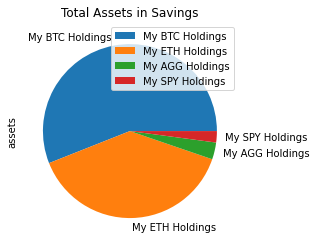

In [210]:
# Plot savings pie chart
df_savings.plot.pie(y="assets", title="Total Assets in Savings")

In [211]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = my_btc_value + my_eth_value + my_agg_value + my_spy_value

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("You have healthy savings and are gonna make it!")
else:
    print("Save more anon or you are NGMI")

You have healthy savings and are gonna make it!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [212]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [156]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

tickers = ["AGG", "SPY"]
timeframe = "1D"

df_tickers = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df


# Display sample data
df_tickers.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [157]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 300
mc_30 = MCSimulation(
    portfolio_data = df_tickers,
    num_simulation = num_sims,
    weights = [.8, .2],
    num_trading_days = 252 * 30
)

In [158]:
# Printing the simulation input data
mc_30.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [159]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005881,1.005140,1.002963,0.997636,1.001462,0.999979,0.997912,0.995356,0.995613,0.998511,...,0.999786,1.002349,1.000447,0.998167,0.998972,0.997248,1.002886,1.002056,0.994967,0.998546
2,1.004903,0.999052,0.998700,0.996498,1.000838,1.004279,0.994241,0.999645,0.996221,1.003954,...,0.995141,1.001654,0.998591,1.001312,0.999698,0.992457,1.000698,1.000711,0.995875,1.005046
3,0.998244,0.998961,1.001833,0.998516,1.008933,1.001626,0.998667,1.005357,0.995637,1.005399,...,0.998339,1.003212,0.997724,1.006257,0.999552,0.984223,1.002028,1.004602,0.992098,1.002742
4,1.004187,0.997714,1.002374,0.997530,1.010177,0.996414,1.001573,0.999907,0.994501,1.004206,...,1.001430,1.001398,0.999690,1.007979,1.005631,0.980666,1.001378,1.008596,0.992832,1.007748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.157720,4.472903,5.591319,2.567545,3.889244,3.841704,4.975078,4.658488,8.950246,3.351335,...,4.522764,3.245817,3.895015,3.490489,2.927401,5.360172,3.470653,3.722642,3.471263,2.463079
7557,5.153159,4.484526,5.600829,2.582496,3.898387,3.855683,4.976919,4.639779,8.937282,3.363395,...,4.538275,3.235971,3.894930,3.494636,2.930441,5.359796,3.474415,3.719927,3.477240,2.469338
7558,5.162991,4.465404,5.620282,2.585106,3.921638,3.882609,4.965212,4.650258,8.930408,3.340410,...,4.557543,3.240804,3.904944,3.512817,2.933397,5.359834,3.450754,3.727610,3.474471,2.472961
7559,5.166630,4.431959,5.623642,2.581758,3.907216,3.858334,4.981305,4.614639,8.917946,3.331504,...,4.553255,3.232381,3.885752,3.502443,2.958178,5.369293,3.458649,3.736341,3.467947,2.459658


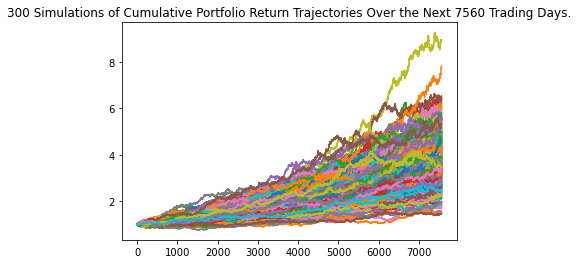

In [160]:
# Plot simulation outcomes
line_plot = mc_30.plot_simulation()

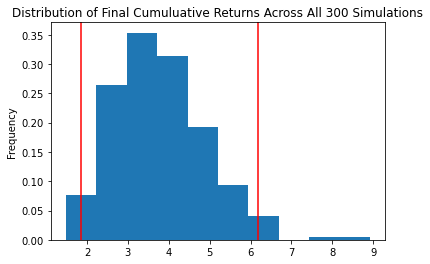

In [162]:
# Plot probability distribution and confidence intervals
dist_plot = mc_30.plot_distribution()

### Retirement Analysis

In [163]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = mc_30.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           300.000000
mean              3.760341
std               1.136484
min               1.479067
25%               2.960353
50%               3.640488
75%               4.430857
max               8.927027
95% CI Lower      1.851670
95% CI Upper      6.173102
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [165]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8]*20000,2)
ci_upper = round(summary_stats[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $37033.39 and $123462.05


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [166]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $37033.39 and $123462.05


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [172]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 300
mc_5 = MCSimulation(
    portfolio_data = df_tickers,
    num_simulation = num_sims,
    weights = [.8, .2],
    num_trading_days = 252 * 5
)

In [174]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995965,0.997876,0.996529,0.997373,0.998708,1.001906,0.997915,0.997751,1.000954,1.003113,...,1.006403,1.001187,1.006764,1.002730,0.998689,1.000410,0.995749,1.005362,1.004210,1.004564
2,0.992044,0.996831,0.993614,0.998037,0.996586,0.998992,0.997791,0.992686,1.000121,1.002394,...,1.004818,0.995601,1.008338,1.004195,1.000440,0.995984,0.999210,1.002959,1.009228,1.002200
3,0.992003,0.997115,0.992287,1.000552,1.003649,1.008465,0.995003,0.989485,1.006411,0.997216,...,1.008624,0.994545,1.015806,1.000532,1.003594,0.998636,0.999401,1.000535,1.012054,1.000823
4,0.991945,0.999566,0.995947,0.997056,1.008687,1.007701,0.999375,0.985228,1.006861,0.992549,...,1.000242,0.995798,1.020385,1.002818,0.998171,0.999863,1.001849,1.003051,1.010998,1.000912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.313523,1.405917,1.195292,1.235266,0.989621,1.165529,1.267369,1.202723,1.389834,1.143407,...,1.042605,1.161633,1.297085,1.209737,1.079985,1.337600,1.196910,1.171686,1.409393,0.995360
1257,1.318122,1.416831,1.194961,1.244417,0.986727,1.168699,1.271669,1.202285,1.392181,1.142517,...,1.044209,1.163378,1.293510,1.217363,1.083061,1.334476,1.196692,1.167173,1.410286,0.995388
1258,1.316790,1.414515,1.201805,1.247212,0.983402,1.167213,1.278126,1.199257,1.384043,1.141414,...,1.049707,1.163296,1.290242,1.218662,1.080555,1.335274,1.198616,1.164949,1.404740,0.994393
1259,1.318148,1.417463,1.200930,1.248060,0.986710,1.169009,1.277706,1.207147,1.382693,1.141066,...,1.048604,1.165283,1.291094,1.221168,1.086696,1.330573,1.205415,1.163634,1.402249,0.992543


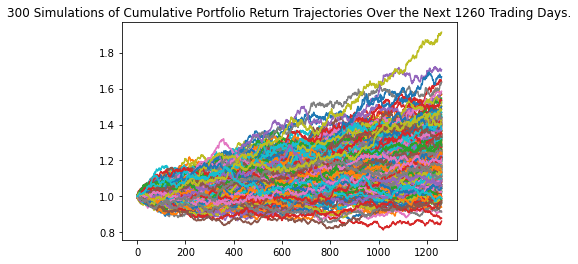

In [175]:
# Plot simulation outcomes
line_plot_5 = mc_5.plot_simulation()

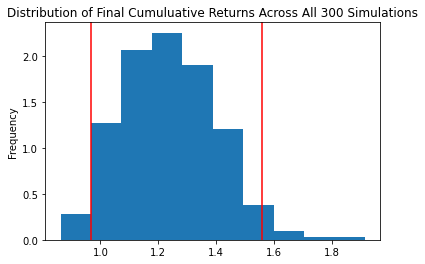

In [176]:
# Plot probability distribution and confidence intervals
dist_plot_5 = mc_5.plot_distribution()

In [178]:
# Fetch summary statistics from the Monte Carlo simulation results
mc5_stats = mc_5.summarize_cumulative_return()

# Print summary statistics
print(mc5_stats)

count           300.000000
mean              1.237603
std               0.160897
min               0.862350
25%               1.120761
50%               1.232655
75%               1.343483
max               1.912914
95% CI Lower      0.965838
95% CI Upper      1.556726
Name: 1260, dtype: float64


In [179]:
# Set initial investment
ii_5 = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_five = round(mc5_stats[8]*ii_5, 2)
ci_upper_five = round(mc5_stats[9]*ii_5, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $19316.77 and $31134.53


### Ten Years Retirement Option

In [180]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 300
mc_10 = MCSimulation(
    portfolio_data = df_tickers,
    num_simulation = num_sims,
    weights = [.8, .2],
    num_trading_days = 252 * 10
)

In [182]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003383,0.998830,1.005247,0.995756,0.999581,1.000195,0.992948,1.008732,1.003665,1.001472,...,1.000388,1.005877,1.001119,0.998726,0.999126,1.007860,0.991660,0.997557,1.006427,1.001770
2,0.995317,0.996585,1.005838,1.000028,0.996394,0.996252,0.988375,1.008202,1.013601,1.004119,...,1.003349,1.007758,1.001631,1.006847,1.004585,1.010755,0.991649,0.997818,1.014587,1.004475
3,0.993672,0.999469,1.003474,0.991761,0.997099,0.997240,0.989677,1.004931,1.013623,1.005904,...,1.006666,1.005707,1.000150,1.007681,1.003727,1.014468,0.987750,1.004275,1.014380,1.008994
4,0.989395,1.001300,1.001668,0.991968,0.996736,0.998939,0.989487,1.007895,1.009949,1.011110,...,1.006953,1.011530,1.002903,1.005563,1.004960,1.009505,0.988518,1.004633,1.019044,1.008000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.447777,1.871614,2.493524,1.583983,1.393381,1.523190,1.377979,1.779139,1.513365,1.611144,...,1.935862,1.356848,1.895895,1.337862,1.377999,1.863692,1.936379,1.688204,1.093214,1.522233
2517,1.447322,1.870014,2.480019,1.587982,1.401745,1.512602,1.372745,1.777048,1.505669,1.611778,...,1.934418,1.351400,1.918686,1.341065,1.379017,1.856440,1.940422,1.682860,1.086086,1.516653
2518,1.441564,1.865553,2.477937,1.582410,1.395709,1.512500,1.364094,1.785234,1.505080,1.617016,...,1.928161,1.356651,1.911647,1.336270,1.376279,1.853131,1.932174,1.685148,1.082107,1.527872
2519,1.433158,1.865069,2.479799,1.580412,1.394368,1.516239,1.356986,1.782995,1.513571,1.619041,...,1.921020,1.355179,1.919216,1.330924,1.381071,1.849830,1.934728,1.680228,1.080577,1.530401


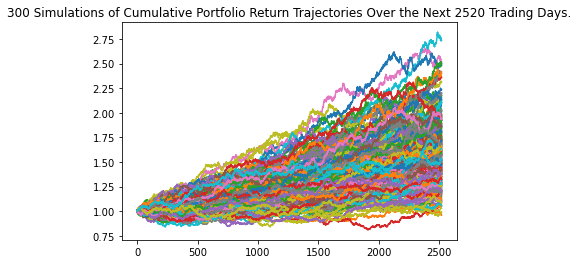

In [183]:
# Plot simulation outcomes
line_plot_10 = mc_10.plot_simulation()

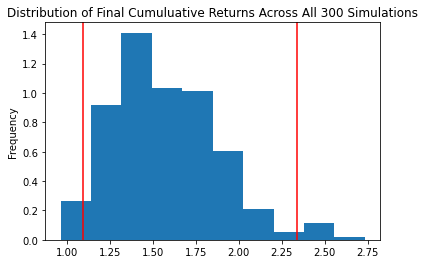

In [184]:
# Plot probability distribution and confidence intervals
dist_plot_10 = mc_10.plot_distribution()

In [185]:
# Fetch summary statistics from the Monte Carlo simulation results
mc10_stats = mc_10.summarize_cumulative_return()

# Print summary statistics
print(mc10_stats)

count           300.000000
mean              1.570163
std               0.306057
min               0.960551
25%               1.352786
50%               1.525883
75%               1.727544
max               2.733899
95% CI Lower      1.092222
95% CI Upper      2.338874
Name: 2520, dtype: float64


In [186]:
# Set initial investment
ii_10 = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_ten = round(mc10_stats[8]*ii_10,2)
ci_upper_ten = round(mc10_stats[9]*ii_10,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $21844.45 and $46777.48
